### Introduction to COSI binned data and CDS
##### Title: Introduction to Compton Data Space & Binned Data with COSI

##### Purpose: To demonstrate how binned Compton event data from COSI can be visualized and analyzed in the Compton Data Space (CDS), especially for simulated GRB detection and localization.

### 🔧 1. Environment Setup

In [1]:
from cosipy import COSILike, BinnedData
from cosipy.spacecraftfile import SpacecraftFile
from cosipy.response.FullDetectorResponse import FullDetectorResponse
from cosipy.util import fetch_wasabi_file

from scoords import SpacecraftFrame

from astropy.time import Time
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.stats import poisson_conf_interval

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from threeML import *
from threeML import Band, PointSource, Model, JointLikelihood, DataList
from cosipy import Band_Eflux
from astromodels import Parameter

from histpy import Histogram, HealpixAxis, Axis
from mhealpy import HealpixMap,HealpixBase

from pathlib import Path

import os
home=os. path. expanduser("~")
home

17:58:31 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=852686;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=426679;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/astromodels/functions/functions_1D/functions.py#47\47]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=193487;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=289699;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/astromodels/functions/functions_1D/functions.py#68\68]8;;\
                  will not be available.                                                                           

17:58:32 WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=12468;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=351564;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/astromodels/functions/functions_1D/absorption.py#33\33]8;;\
                  available                                                                                        

17:58:35 INFO      Starting 3ML!                                                                     ]8;id=332760;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=587115;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py#39\39]8;;\

         WARNING   WARNINGs here are NOT errors                                                      ]8;id=524504;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=704728;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py#40\40]8;;\

         WARNING   but are inform you about optional packages that can be installed                  ]8;id=910352;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=494938;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py#41\41]8;;\

         WARNING    to disable these messages, turn off start_warning in your config file            ]8;id=997970;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=440137;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py#44\44]8;;\

17:58:36 WARNING   ROOT minimizer not available                                                ]8;id=566772;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=107103;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/threeML/minimizer/minimization.py#1345\1345]8;;\

         WARNING   Multinest minimizer not available                                           ]8;id=523731;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=84716;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/threeML/minimizer/minimization.py#1357\1357]8;;\

         WARNING   PyGMO is not available                                                      ]8;id=288683;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/threeML/minimizer/minimization.py\minimization.py]8;;\:]8;id=277662;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/threeML/minimizer/minimization.py#1369\1369]8;;\

17:58:38 WARNING   The cthreeML package is not installed. You will not be able to use plugins which  ]8;id=68196;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=78303;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py#94\94]8;;\
                  require the C/C++ interface (currently HAWC)                                                     

         WARNING   Could not import plugin HAWCLike.py. Do you have the relative instrument         ]8;id=638776;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=106047;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

         WARNING   Could not import plugin FermiLATLike.py. Do you have the relative instrument     ]8;id=556826;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=65068;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

17:58:41 WARNING   No fermitools installed                                              ]8;id=322442;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=777459;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py#44\44]8;;\

17:58:41 WARNING   Env. variable OMP_NUM_THREADS is not set. Please set it to 1 for optimal         ]8;id=300755;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=115529;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

         WARNING   Env. variable MKL_NUM_THREADS is not set. Please set it to 1 for optimal         ]8;id=923576;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=40074;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

         WARNING   Env. variable NUMEXPR_NUM_THREADS is not set. Please set it to 1 for optimal     ]8;id=958618;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=23175;file:///home/gamma/.conda/envs/cosipy/lib/python3.10/site-packages/threeML/__init__.py#387\387]8;;\
                  performances in 3ML                                                                              

'/home/gamma'

This notebook is an introduction to some functionalities of the BinnedData class in cosipy and to the visualization of sources in the Compton Data Space. I am using a binned dataset from DC2, that includes a simulated GRB and albedo background photons.

## Load the data

I assume that the reader already knows how to create a binned COSI dataset.
To instatiate a BinnedData object, we need a binned COSI dataset (.hdf5) and the configuration file (.yaml) that containes the information on how all the axes are binned.

In [2]:
print("\nLoading GRB dataset...")
data_path = Path("./")
grbd = BinnedData(data_path / "grb_bk.yaml") #Backgroud
grbd.load_binned_data_from_hdf5(binned_data=data_path / "grb101216721_bk_binned_data.hdf5") #GRB Data
print("Dataset loaded successfully.")


Loading GRB dataset...
Dataset loaded successfully.


## Explore the data

A binned data COSI dataset consists in an hystogram with 5 axes. We can access to several pieces of information of the hystogram by calling the binned_data method of the BinnedData object:

In [4]:
# --- 3. EXPLORE AXIS LABELS AND STRUCTURE ---
# The COSI binned data is a 5D histogram: Time, Em, Phi, Psi, Chi

print("\nAvailable axes in dataset:", grbd.binned_data.axes.labels)
print("Energy bin edges:", grbd.binned_data.axes["Em"].edges)
print("Number of bins in Phi (scatter angle):", grbd.binned_data.axes["Phi"].nbins)
print("HEALPix coordinate system:", grbd.binned_data.axes["PsiChi"].coordsys)
print("HEALPix scheme:", grbd.binned_data.axes["PsiChi"].scheme)
print("HEALPix resolution (nside):", grbd.binned_data.axes["PsiChi"].nside)


Available axes in dataset: ['Time' 'Em' 'Phi' 'PsiChi']
Energy bin edges: [ 100.  200.  500. 1000. 2000. 5000.] keV
Number of bins in Phi (scatter angle): 18
HEALPix coordinate system: <Galactic Frame>
HEALPix scheme: RING
HEALPix resolution (nside): 8


### Dataset Axes and Metadata (COSI Binned Data)

The dataset is a 5D histogram with the following axes:

- **Time**: Photon arrival time (in MET), useful for time filtering.
- **Em (Energy Measured)**: Photon energy in keV.
- **Phi (ϕ)**: Compton scatter angle.
- **PsiChi (Ψ, χ)**: Sky coordinates (Galactic frame, HEALPix format).

#### Energy Bins:
- Bin edges: `[100, 200, 500, 1000, 2000, 5000]` keV
- Total: 5 energy bins

#### Phi:
- 18 scatter angle bins for cone reconstruction

#### Sky Map:
- **HEALPix Frame**: Galactic
- **Scheme**: RING
- **nside**: 8 → 768 pixels

These parameters define the Compton Data Space (CDS) for spatial, spectral, and temporal GRB analysis.


### --- 4. VISUALIZE DISTRIBUTIONS ---
##### Plot photon counts projected over different individual axes

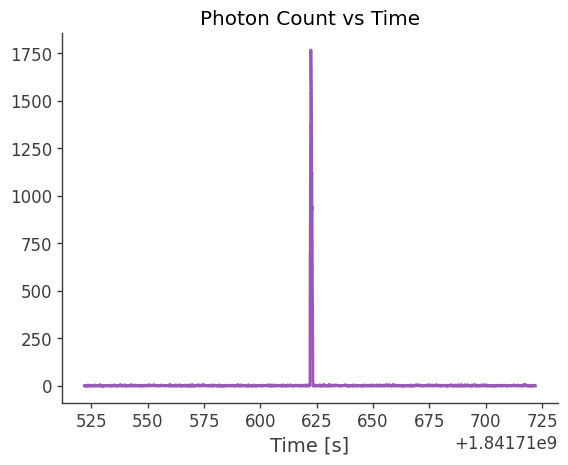

In [5]:


# Time
grbd.binned_data.project("Time").plot()
plt.title("Photon Count vs Time")
plt.show()



### Photon Count vs Time

- **X**: Time since mission start  
- **Y**: Photon counts per bin

A sharp spike marks the GRB event; flat regions are background.  
Smaller time bins show sharper spikes.


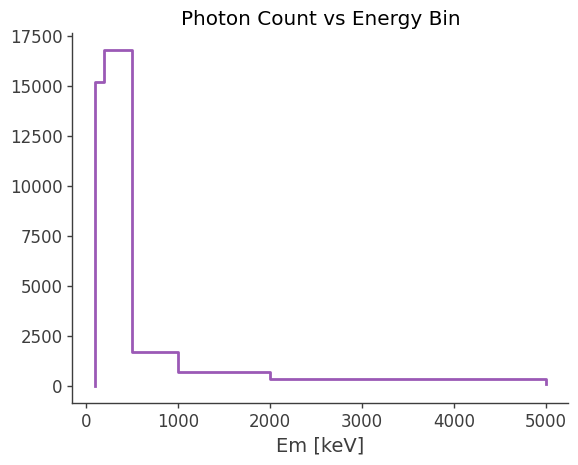

In [22]:
# Energy
grbd.binned_data.project("Em").plot()
plt.title("Photon Count vs Energy Bin")
plt.show()



### Photon Count vs Energy

- **X**: Energy (keV)  
- **Y**: Photon counts per bin

Most photons are in the 100–500 keV range, indicating lower-energy gamma-ray dominance.  
Adjusting energy bins changes the histogram resolution.



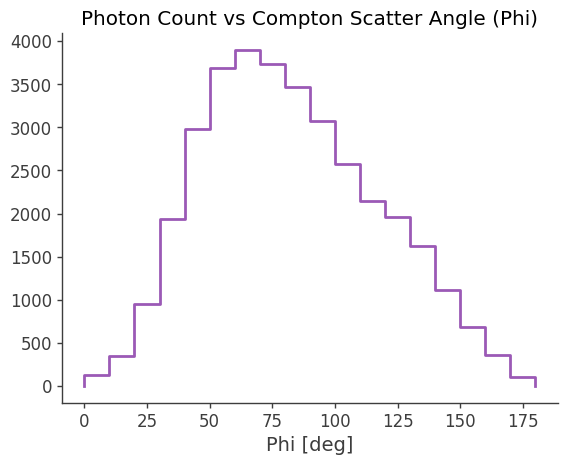

In [6]:
# Scatter Angle
grbd.binned_data.project("Phi").plot()
plt.title("Photon Count vs Compton Scatter Angle (Phi)")
plt.show()

### Photon Count vs Scatter Angle (Phi)

- **X**: Compton scatter angle (°)  
- **Y**: Photon counts per bin

The plot peaks around 60–70°, typical of Compton scattering.  
Adjusting Phi bin size changes angular resolution—narrower bins show more detail but may add noise.


(<Axes: xlabel='Phi [deg]'>, <ErrorbarContainer object of 3 artists>)

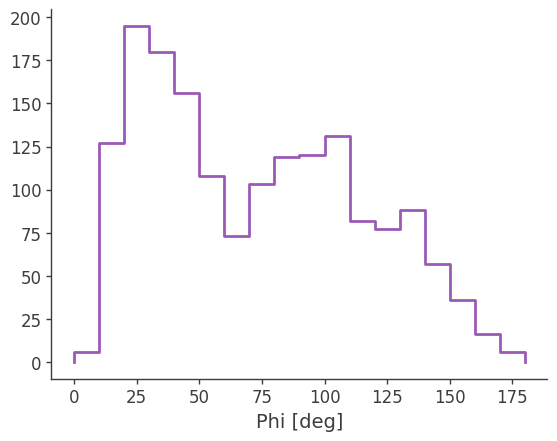

In [7]:
# ## 📊 Photon Count vs Compton Scatter Angle (Phi) — for a Specific Energy Bin


grbd.binned_data.slice[{"Em": 2}].project("Phi").plot()



### Phi Distribution for a Specific Energy Bin

This plot shows how Compton scatter angles (Φ) are distributed for photons in the 3rd energy bin (500–1000 keV).

```python
grbd.binned_data.slice[{"Em": 2}].project("Phi").plot()


### 📝 Try This Yourself!

Test how this distribution changes with energy:

```python
grbd.binned_data.slice[{"Em": 0}].project("Phi").plot()
grbd.binned_data.slice[{"Em": 1}].project("Phi").plot()
grbd.binned_data.slice[{"Em": 3}].project("Phi").plot()


(<Mollview: >, <matplotlib.image.AxesImage at 0x7f871e2c3460>)

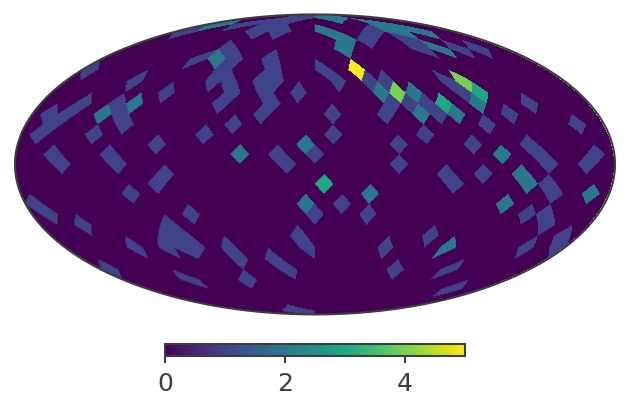

In [8]:
## 🌌 Sky Map of Photon Distribution (PsiChi) for Specific Energy & Scatter Angle



grbd.binned_data.slice[{"Em":2,"Phi":2}].project("PsiChi").plot()

### Sky Map of Photon Directions (PsiChi)

This plot shows where photons likely came from in the sky, based on a specific energy and scatter angle bin.




### 📝 Try This!

Test how sky maps change with different energy and scatter angle bins:

```python
grbd.binned_data.slice[{"Em":0, "Phi":2}].project("PsiChi").plot()
```

```python
grbd.binned_data.slice[{"Em":2, "Phi":7}].project("PsiChi").plot()
```

Observe how the shape, size, and intensity of the Compton ring changes with photon energy and angle!


(<Mollview: >, <matplotlib.image.AxesImage at 0x7f871e26c5b0>)

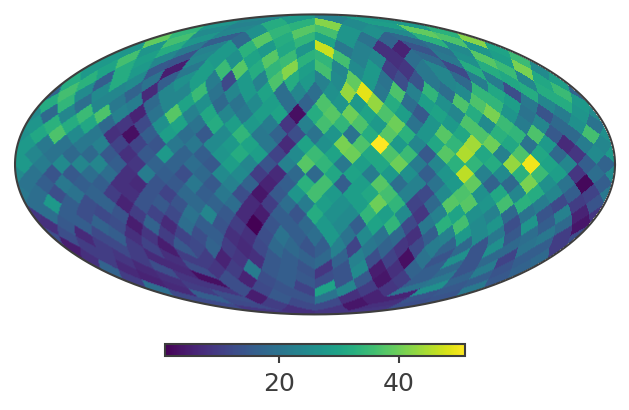

In [9]:
grbd.binned_data.slice[{"Em":1}].project("PsiChi").plot()

## All-Sky Photon Map for Energy Bin 1 (No Phi Slicing)

This plot shows the full-sky distribution of photons for energy bin 1 (200–500 keV), without filtering by scatter angle.

### Code:
```python
grbd.binned_data.slice[{"Em": 1}].project("PsiChi").plot()


### 📝 Suggested Experiments

Compare this plot with:

```python
grbd.binned_data.slice[{"Em":1, "Phi":4}].project("PsiChi").plot()
```

to see how selecting a specific Compton scatter angle sharpens the sky map and reveals Compton ring structures.

```python
grbd.binned_data.slice[{"Em":2}].project("PsiChi").plot()
```

to compare how the sky map changes with photon energy.


As we can see, the most of the counts of this dataset are at the time of the burst, in first two energy channels (up to 0.5 MeV) and at Compton scatter angle between 50 and 100 degrees. If we want to access the counts contained in the hystogram projected on a particular axis we can do:

In [10]:
counts = grbd.binned_data.project("Em").contents.todense()
counts

array([15191., 16784.,  1680.,   709.,   345.])

### Photon Counts per Energy Bin

This retrieves total photon counts for each energy bin:



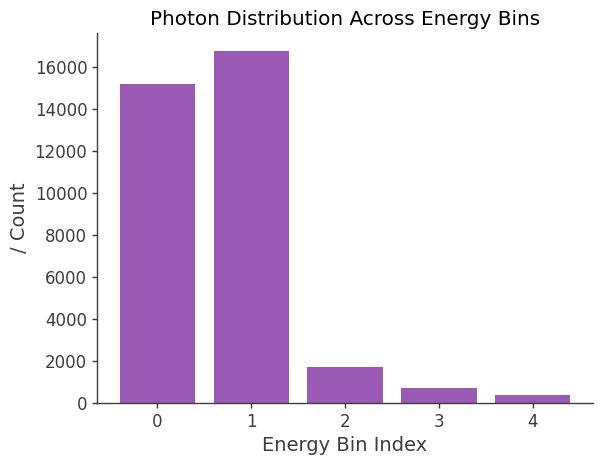

In [11]:
plt.bar(range(len(counts)), counts)
plt.xlabel("Energy Bin Index")
plt.ylabel("/ Count")
plt.title("Photon Distribution Across Energy Bins")
plt.show()

A dataset can be sliced in any axis, e.g. I can take only a time slice of interest:


In [12]:
# --- 5. SLICE TIME AROUND GRB BURST ---
# Focus on a specific time range that covers the burst

print("\nTime slicing around GRB burst...")
tmin = 1841710621.9
tmax = 1841710623.4
edges_time = grbd.binned_data.axes['Time'].edges.value
idx_tmin = np.where(edges_time >= tmin)[0][0]
idx_tmax = np.where(edges_time <= tmax)[0][-1]
tsliced = grbd.binned_data.slice[{"Time": slice(idx_tmin, idx_tmax)}]


Time slicing around GRB burst...



### Time Slicing Around GRB Burst

This code extracts only the time interval during which the GRB occurred:

### What it does:
- `tmin`, `tmax`: Define the GRB time window (in MET)
- `edges_time`: Gets time bin edges
- `idx_tmin`, `idx_tmax`: Locate indices for the time range
- `tsliced`: Contains only data from the GRB interval

### Why it matters:
- Removes background photons before/after the burst
- Improves signal-to-noise
- Prepares data for cleaner sky maps and model fitting

### Notes:
- Time window should tightly surround the burst
- A key step in transient GRB analysis using Compton data


<Figure size 640x480 with 0 Axes>

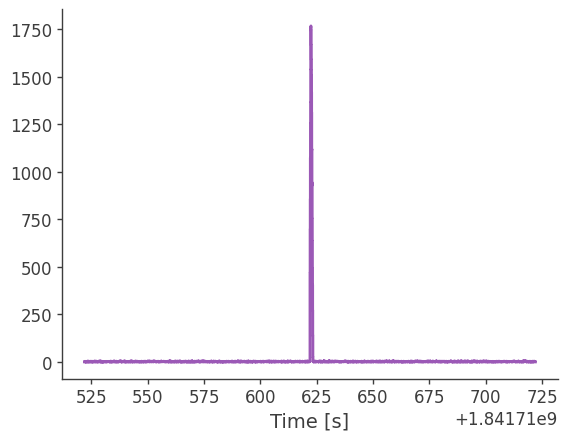

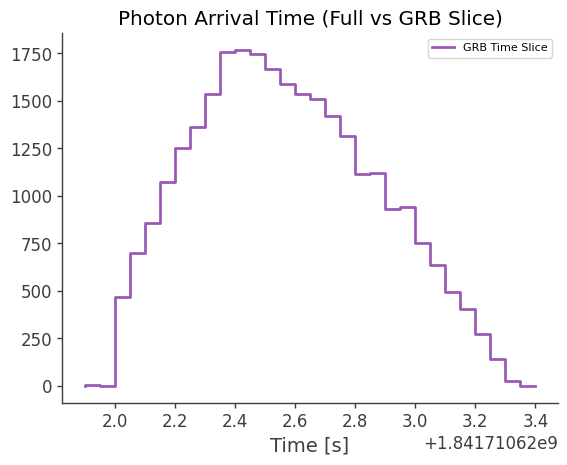

In [13]:
# Plot sliced data
plt.figure()
grbd.binned_data.project("Time").plot(label='Full')
tsliced.project("Time").plot(label='GRB Time Slice')
plt.title("Photon Arrival Time (Full vs GRB Slice)")
plt.legend()
plt.show()


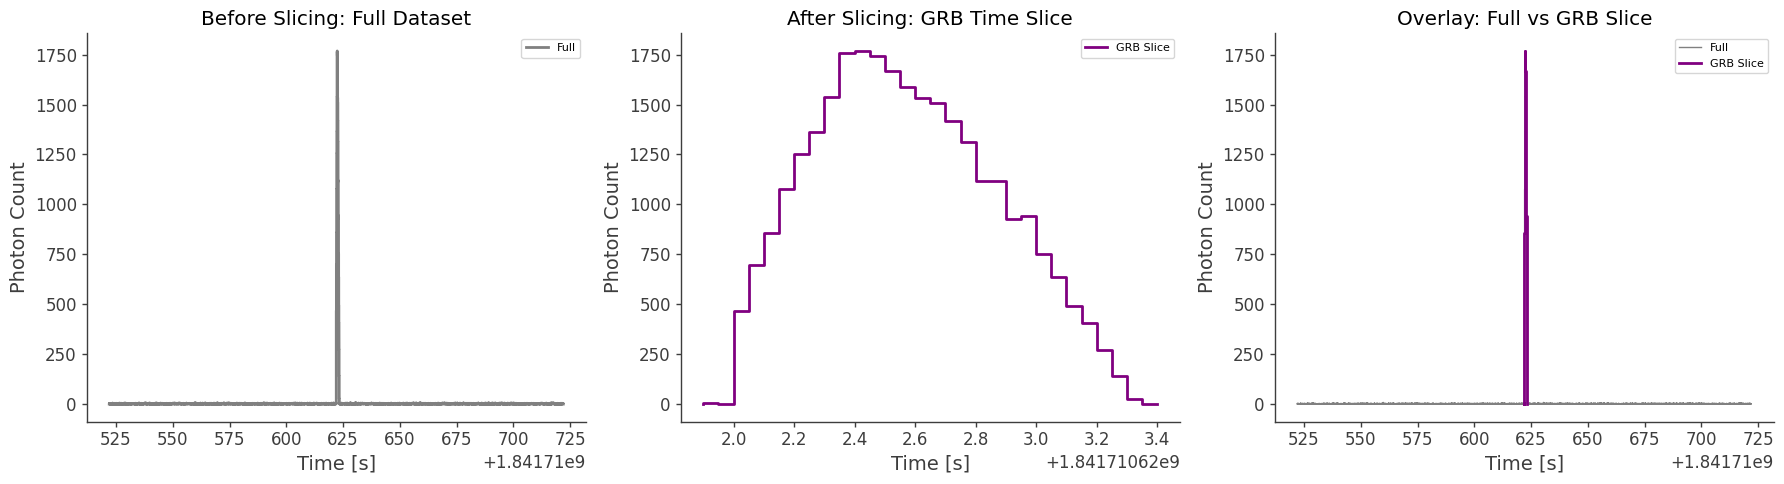

In [14]:
# --- Photon Arrival Time: Full vs Sliced ---

# Set up subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Full dataset
axs[0].set_title("Before Slicing: Full Dataset")
grbd.binned_data.project("Time").plot(ax=axs[0], color='gray', label='Full', lw=2)
axs[0].set_xlabel("Time [s]")
axs[0].set_ylabel("Photon Count")
axs[0].legend()

# Plot 2: Time-sliced only (GRB burst)
axs[1].set_title("After Slicing: GRB Time Slice")
tsliced.project("Time").plot(ax=axs[1], color='purple', label='GRB Slice', lw=2)
axs[1].set_xlabel("Time [s]")
axs[1].set_ylabel("Photon Count")
axs[1].legend()

# Plot 3: Overlay of both
axs[2].set_title("Overlay: Full vs GRB Slice")
grbd.binned_data.project("Time").plot(ax=axs[2], color='gray', label='Full', lw=1)
tsliced.project("Time").plot(ax=axs[2], color='purple', label='GRB Slice', lw=2)
axs[2].set_xlabel("Time [s]")
axs[2].set_ylabel("Photon Count")
axs[2].legend()

plt.tight_layout()
plt.show()


### Photon Arrival Time — Before and After Slicing

These plots compare photon arrival times before and after time slicing:

- **Left**: Full dataset  
  Shows all photons. The GRB appears as a sharp spike, with background before and after.

- **Middle**: GRB slice  
  Only includes photons from `tmin = 1841710621.9` to `tmax = 1841710623.4`.  
  Highlights burst structure while excluding background.

- **Right**: Overlay  
  Shows both full data (gray) and sliced burst (purple) to visualize the effect of slicing.

### Why this matters:
- GRBs are brief — most signal lies in a narrow time window
- Slicing removes background noise
- Essential for cleaner analysis, TS mapping, and modeling



Basically, in this case the data were binned in the Galactic frame, and we have an healpix map built according the ring convention an with nside=8. This parameter defines the resolution of the map. See: https://astropy-healpix.readthedocs.io/en/latest/index.html. Now let's plot it:

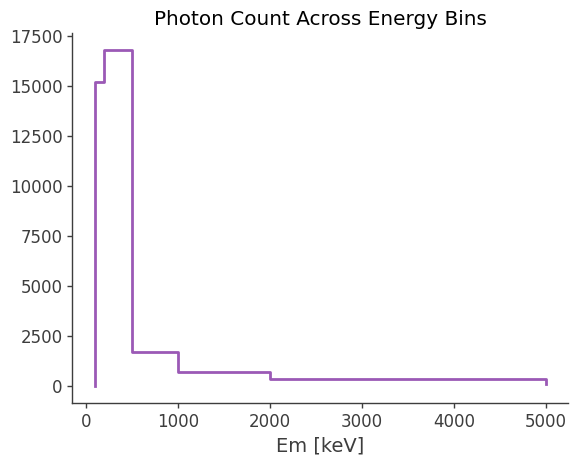


Energy bin counts: [15191. 16784.  1680.   709.   345.]


In [15]:
# --- 6. INSPECT ENERGY DISTRIBUTION ---
# Access and print actual photon counts per energy bin

grbd.binned_data.project("Em").plot()
plt.title("Photon Count Across Energy Bins")
plt.show()

energy_counts = grbd.binned_data.project("Em").contents.todense()
print("\nEnergy bin counts:", energy_counts)

(<Mollview: >, <matplotlib.image.AxesImage at 0x7f871c646c20>)

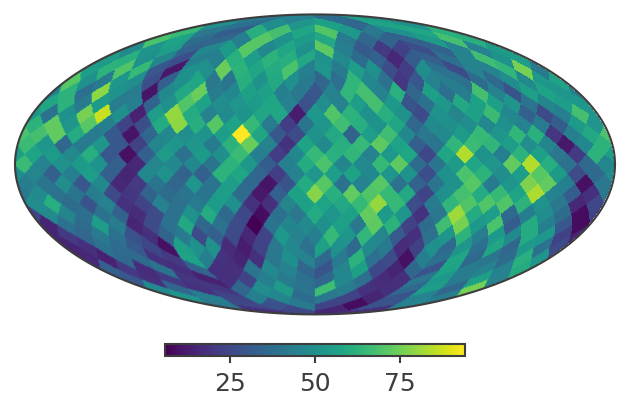

In [16]:
grbd.binned_data.project("PsiChi").plot()

Since we are plotting data at any energy,and Compton scatter angle,we cannot really appreciate here how a source appears in Compton data space. Now let's slice the dataset in Energy (we take the first two channels, where most of the count are) and in Phi (we take the first three channels i.e. up to 20 degree). For this we use a dedicated method of the Binned Data class. This is an implementation of the slicing functionality I showed above. Since in this case the PsiChi map is binned in the Galactic frame, we plot as a comparison the true location of the source:

### All-Sky Photon Map without Slicing (Full CDS Projection)

This code shows a full-sky map of all photons, without filtering by energy or angle:

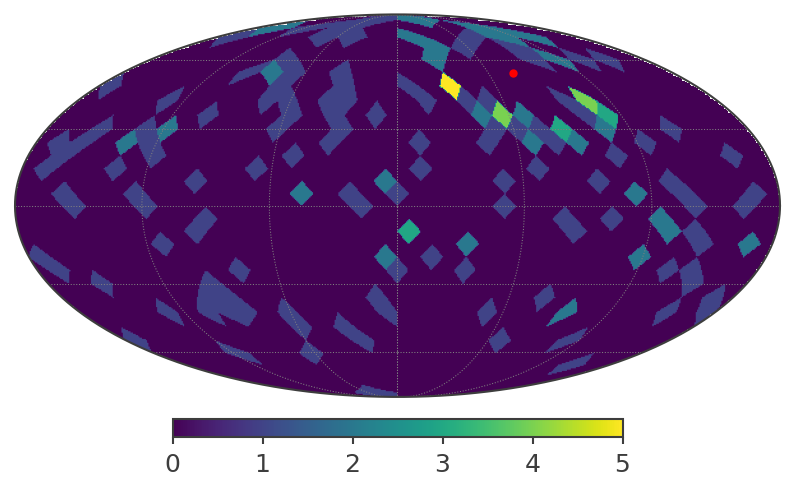

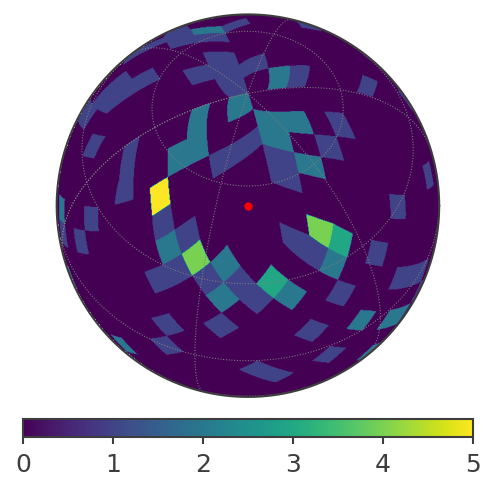

In [44]:
l = 284.0
b = 54.0

# Make sure the filename matches your actual HDF5 output
grbd_path = data_path / "grb101216721_bk_binned_data.hdf5"

# Use grbd_path consistently
grbd.plot_psichi_map_slices(
    Em=2,
    phi=2,
    output="my_plot",
    coords=[l, b],
    binned_data=grbd_path,
    show_plots=True
)


### Visualizing Compton Sky Map with Known GRB Location

### What This Code Does



This block generates a **sky map visualization** (in `PsiChi` space) showing the photon distribution in the sky for a **specific energy and scatter angle range**, and it overlays the **true GRB location** in Galactic coordinates.





##### Inside the function call:

- `Em=1`: Selects the **second energy bin** (200–500 keV).
- `phi=2`: Selects the **third Phi bin** (e.g., ~20–30 degrees scatter angle).
- `coords=[l, b]`: Overlays a red dot on the plot at the known GRB location.
- `output="my_plot"`: Saves the image with this filename.
- `show_plots=True`: Displays the plots in the notebook.

---

### Output Interpretation

Two types of plots may be shown:

1. **Mollweide Projection (Full Sky)**:
   - Shows photon distribution across the whole Galactic sky.
   - The **yellow spot** indicates regions with more overlapping Compton cones.
   - The **red dot** shows the known GRB location — ideally overlapping the yellow region.

2. **Gnomonic Projection (Zoomed-In)**:
   - Provides a **zoomed-in, flat projection** centered around the GRB.
   - Helpful for clearly visualizing the source localization and match between simulation and observation.

---

### Parameter Effects

| Parameter | Description |
|----------|-------------|
| `Em` | Controls the photon energy range. Lower energy bins usually have more counts. |
| `phi` | Controls the Compton scatter angle. Smaller Phi means larger rings; higher Phi means tighter rings. |
| `coords` | Must match the true source location for correct validation. |
| `show_plots` | Set to `True` to visualize, or `False` to only save without displaying. |

---

### Why This Is Important

This visualization helps confirm whether the **signal photons** reconstruct to the correct **sky location** of the source:

- In Compton imaging, each photon traces a ring (Compton cone).
- Where multiple cones intersect = **likely source location**.
- Comparing this to the ground-truth (red dot) validates the instrument response and reconstruction accuracy.

---

### Final Note

Make sure the energy (`Em`) and angle (`phi`) you choose **contain sufficient photon counts** for meaningful visualization. You can check energy-wise counts using:

```python
grbd.binned_data.project("Em").contents.todense()
```


In [17]:
#aotmated loop for download all maps


# --- 7. PLOT PSICHI SKY MAPS FOR DIFFERENT ENERGY & SCATTER ANGLES ---
# PsiChi represents sky position (healpix format). Try different Em & Phi values to see ring changes.

# l = 284.0  # True GRB Galactic longitude
# b = 54.0   # True GRB Galactic latitude
# grbd_path = data_path / "grb101216721_bk_binned_data.hdf5"

# # Generate sky maps for a few (Em, Phi) combinations
# for em in [0, 1, 2]:
#     for phi in [1, 2, 3]:
#         print(f"Plotting sky map for Em={em}, Phi={phi}")
#         grbd.plot_psichi_map_slices(Em=em, phi=phi,
#                                     output=f"Map_Em{em}_Phi{phi}",
#                                     coords=[l, b],
#                                     binned_data=grbd_path,
#                                     show_plots=True)

What we can now appreciate is basically a section of the Compton cone that a point-like source forms in CDS. It is a useful exercise to change the value of Phi of this plot. You will see that for different values of Phi, the ring appears narrower/larger because you are selecting smaller Compton scatter angle-energy/larger scatter angle-energy. Indeed, because of the physics of Compton interaction, more energetic photons are scattered at larger angles. The images below describe the Compton cone.  

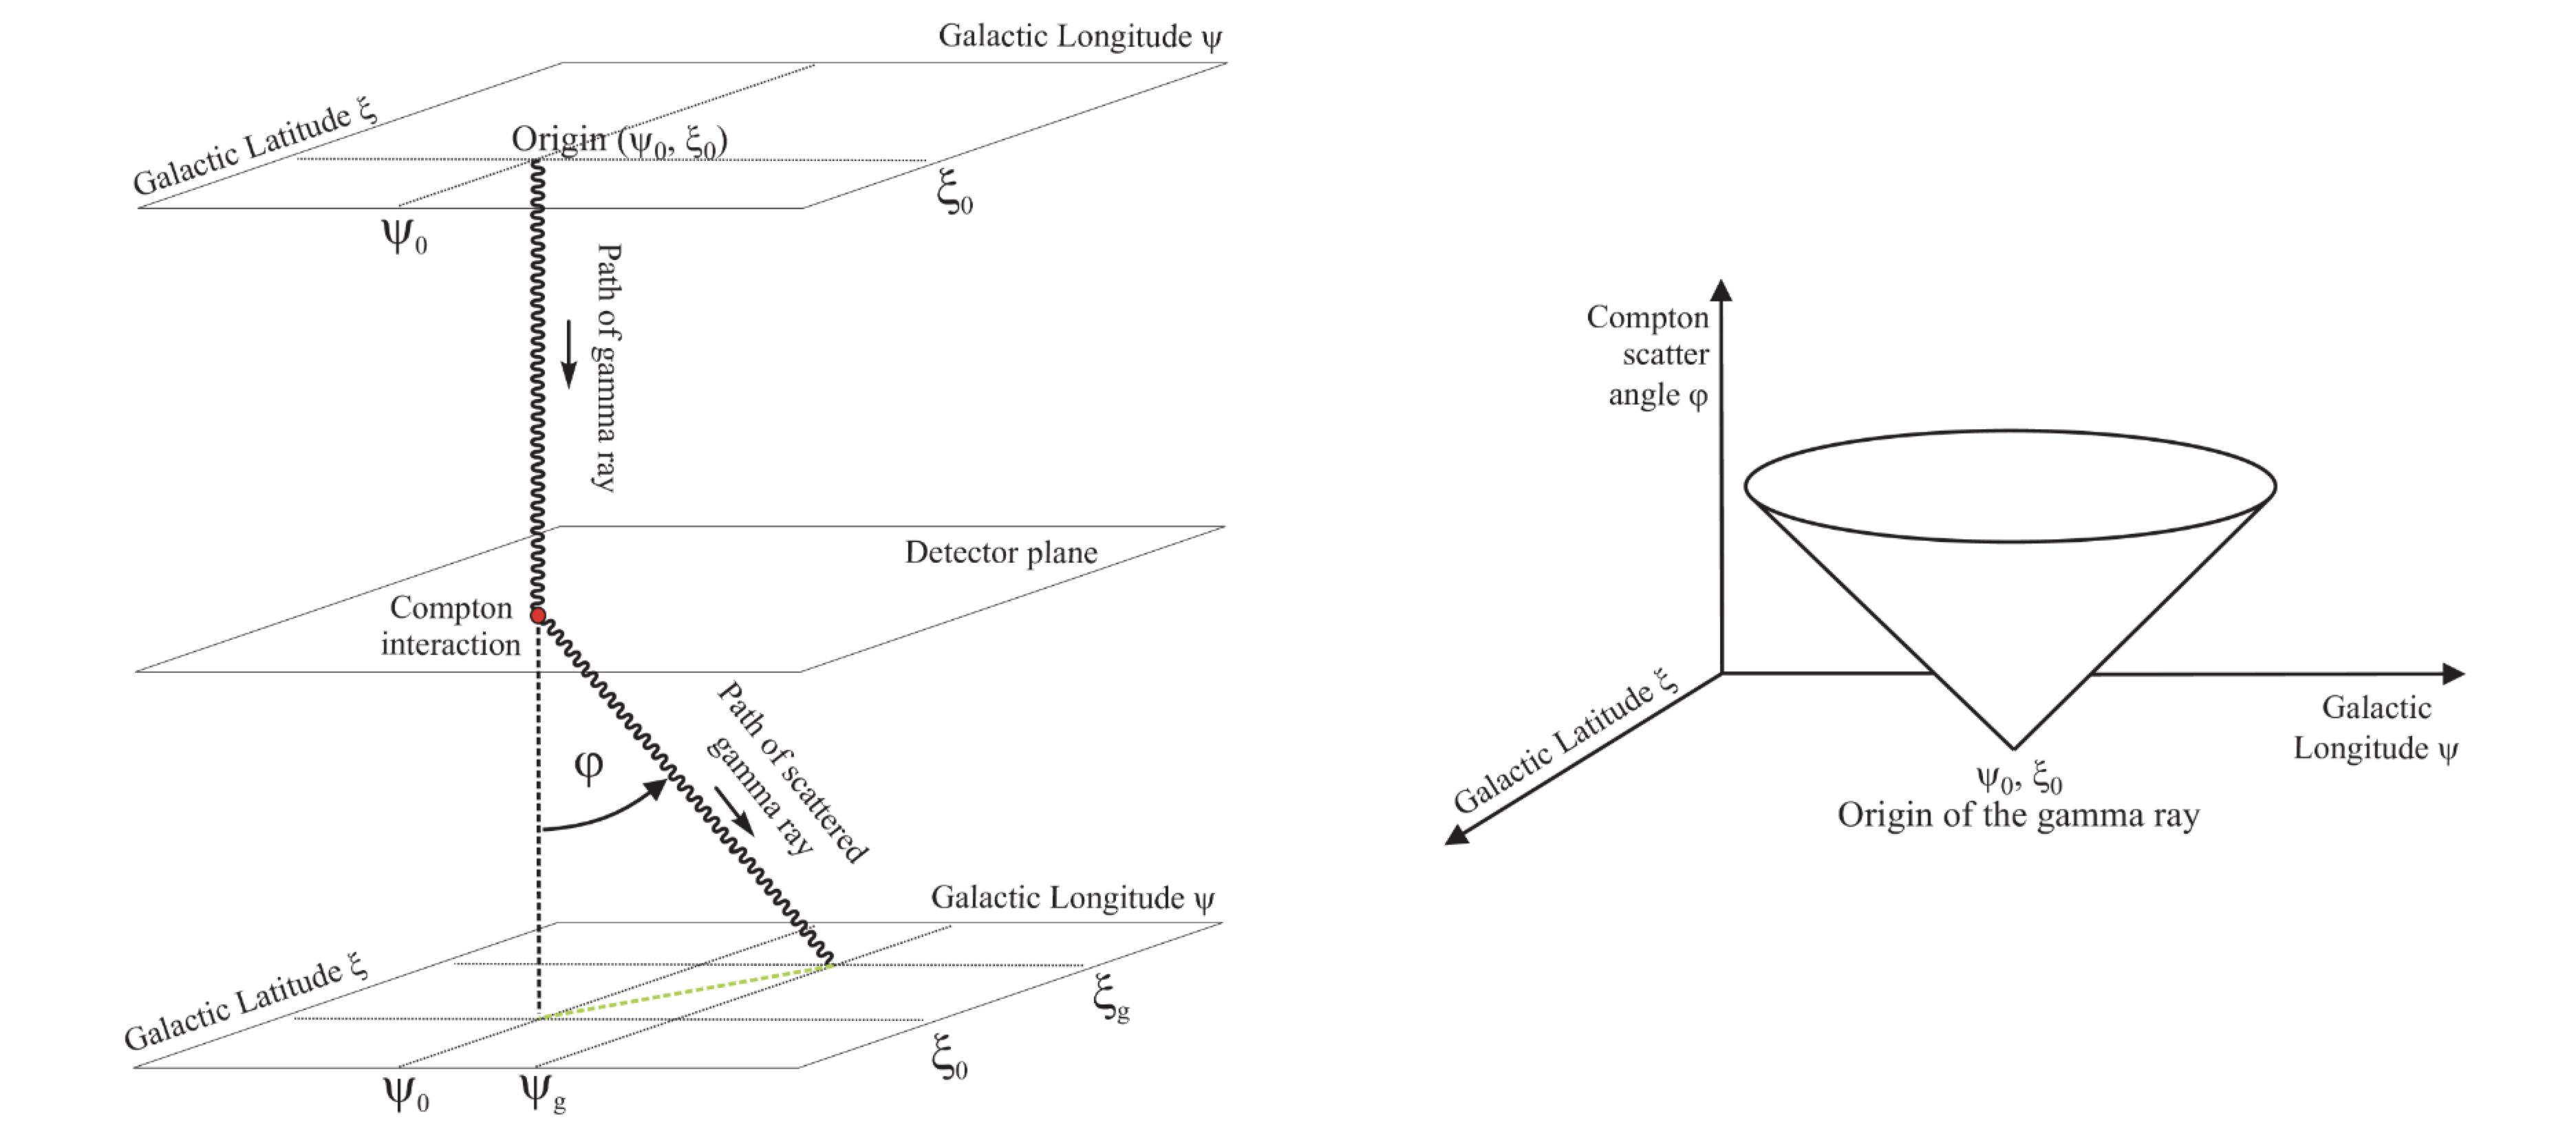

Useful references taht describes the CDS are e.g. Zoglauer+21(https://arxiv.org/pdf/2102.13158), Martinez-Castellanos+23(https://arxiv.org/abs/2308.11436).  The tip of the cone for small scattering angles corresponds to the location of the source in the sky.

## Understanding the Compton Cone Geometry

This concept explains how Compton telescopes like COSI trace the origin of gamma rays using Compton scattering.

---

### 2D View: Photon Interaction

- A gamma-ray enters the detector from direction (`ψ₀`, `ξ₀`).
- It scatters at an angle `φ`, which is computed from the energy deposits.
- The scatter direction and point are recorded.
- This defines a **cone** of possible photon origins.

---

### 3D View: Compton Cone

- A 3D cone is reconstructed using the scatter point and angle `φ`.
- The tip of the cone is the interaction point in the detector.
- The surface of the cone represents all possible photon directions in Galactic coordinates (`ψ`, `ξ`).

---

### Why It Matters

- One photon defines a cone, not a single direction.
- Multiple photons produce cones that intersect.
- The intersection region indicates the likely source (e.g., a GRB).

---

### Summary

| Term               | Meaning                                              |
|--------------------|------------------------------------------------------|
| `φ` (phi)          | Scatter angle between incoming and outgoing photon   |
| `ψ`, `ξ`           | Galactic coordinates of possible origins             |
| Cone surface       | Possible incoming directions for one photon          |
| Cone intersection  | Likely location of the source                        |

This is the basis of Compton imaging—used for sky maps, source localization, and TS maps.


